# ML Models

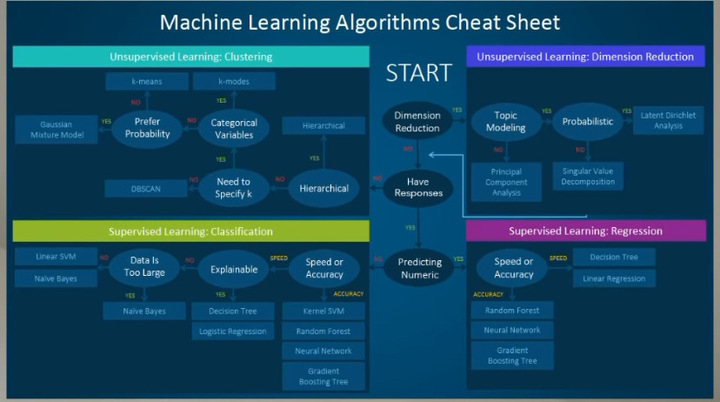

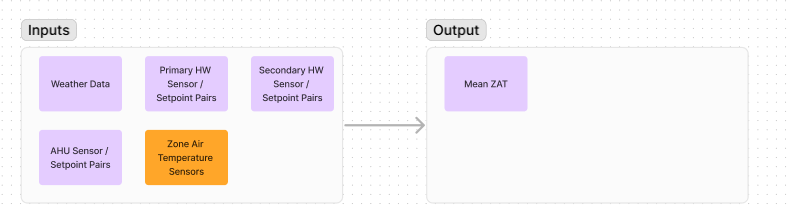

Aim:

Testing ML models to predict the Mean Indoor Temperature

Models to TEST:
- Decision Tree Regressor 
- Random Forest 
- Gradient Boosting Tree


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# add the path to the root folder
path_to_main = "../../"

In [3]:
import sys

sys.path.append(path_to_main)

In [4]:
import pandas as pd
from src.data.load_traning_data import load, combine
import numpy as np
from matplotlib import pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
data = load(path_to_data_folder=path_to_main)
combined_df = combine(data)
combine_X = combined_df.drop("ZAT", axis=1)
Y = combined_df["ZAT"]

In [7]:
combine_X.loc["2024-01-01":]

,AHU 1#setpoint,AHU 1#fan,AHU 1#sensor,Primary HW1#sensor,Primary HW1#setpoint,Secondary HW.Radiators.HeatingCurve#sensor,Secondary HW.Radiators.HeatingCurve#setpoint,DD,FH,temperature,ghi,R,S,U
datetime,,,,,,,,,,,,,,
2024-01-01 00:00:00+00:00,22.000000,1.0,20.038334,24.584999,22.761667,24.584999,22.301666,200,10.0,7.2,0.00000,1.0,0.0,91
2024-01-01 01:00:00+00:00,22.000000,1.0,20.013334,27.340000,26.184999,27.340000,22.343332,210,10.0,7.7,0.00000,1.0,0.0,90
2024-01-01 02:00:00+00:00,21.981667,1.0,19.941668,25.615000,25.040001,25.615000,21.213333,200,10.0,7.3,0.00000,1.0,0.0,93
2024-01-01 03:00:00+00:00,21.938334,1.0,19.973333,24.948334,22.008333,24.948334,21.783333,220,9.0,7.7,0.00000,1.0,0.0,92
2024-01-01 04:00:00+00:00,22.000000,1.0,19.936666,26.551666,26.111668,26.551666,22.270000,230,8.0,8.8,0.00000,1.0,0.0,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-10 18:00:00+00:00,22.096666,0.0,20.938334,32.848331,20.000000,32.848331,20.000000,310,5.0,10.1,27.77780,1.0,0.0,93
2024-06-10 19:00:00+00:00,22.100000,0.0,20.903334,31.168333,20.000000,31.168333,20.000000,320,5.0,10.3,11.11112,1.0,0.0,88
2024-06-10 20:00:00+00:00,22.100000,0.0,20.881666,29.713333,20.000000,29.713333,20.000000,320,5.0,10.5,0.00000,1.0,0.0,85


In [8]:
X_train = combine_X.loc[:"2023-12-31"]
X_test = combine_X.loc["2024-01-01":]
y_train = Y.loc[:"2023-12-31"]
y_test = Y.loc["2024-01-01":]

# Random Forest

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [9]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
y_pred = forest.predict(X_test)

# Calculate MSE and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mae, rmse)

1.6774629576703952 2.3097332374806636


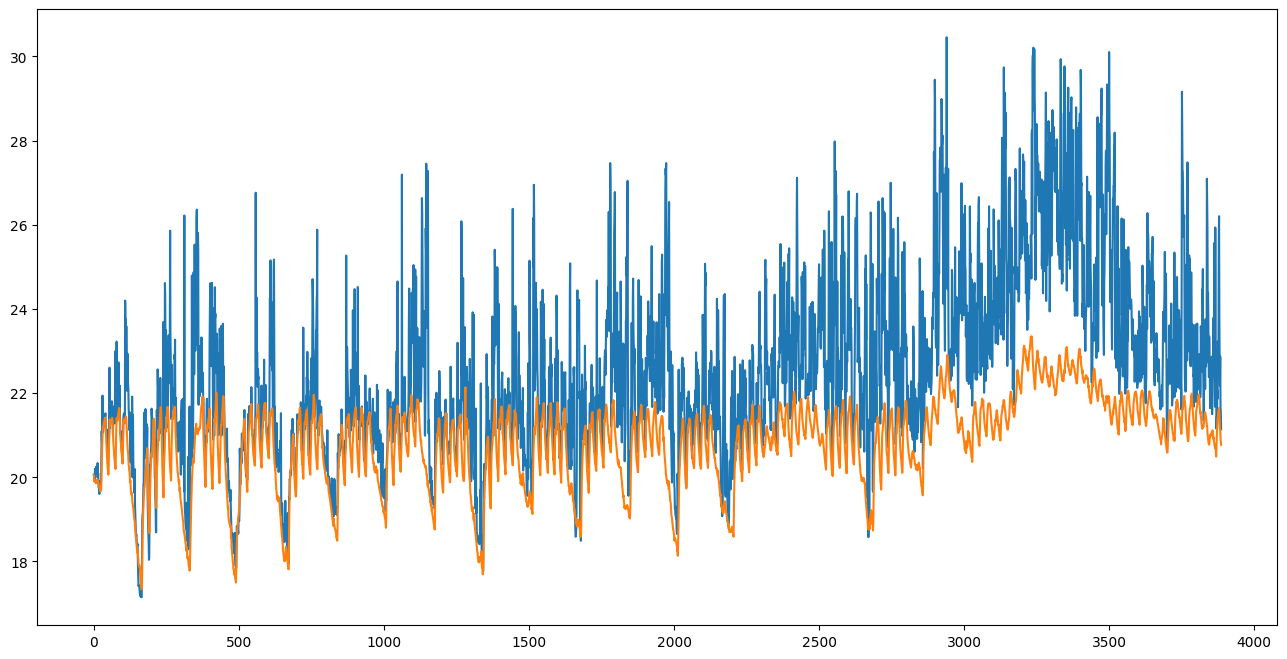

In [13]:
fig, ax = plt.subplots(1, figsize=(16, 8))

ax.plot(y_pred)
ax.plot(y_test.values)

## Hyperparamter Tuning

In [16]:
forest_pipeline = Pipeline(
    [("scaler", StandardScaler()), ("regressor", RandomForestRegressor())]
)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ["sqrt", "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


forest_param_grid = {
    "regressor__n_estimators": n_estimators,
    "regressor__max_depth": max_depth,
    "regressor__min_samples_split": min_samples_split,
    "regressor__min_samples_leaf": min_samples_leaf,
    "regressor__max_features": max_features,
    "regressor__bootstrap": bootstrap,
}

In [17]:
from sklearn.model_selection import RandomizedSearchCV

In [18]:
grid_search = RandomizedSearchCV(
    estimator=forest_pipeline,
    param_distributions=forest_param_grid,
    n_iter=10,
    cv=None,
    verbose=2,
    random_state=42,
)
# Fit the random search model (un comment and add the proper training data)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END regressor__bootstrap=True, regressor__max_depth=50, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=10, regressor__n_estimators=200; total time=   6.1s
[CV] END regressor__bootstrap=True, regressor__max_depth=50, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=10, regressor__n_estimators=200; total time=   5.6s
[CV] END regressor__bootstrap=True, regressor__max_depth=50, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=10, regressor__n_estimators=200; total time=   5.7s
[CV] END regressor__bootstrap=True, regressor__max_depth=50, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=10, regressor__n_estimators=200; total time=   5.8s
[CV] END regressor__bootstrap=True, regressor__max_depth=50, regressor__max_features=log2, regressor__min_samples_leaf=2, regre

In [19]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(max_depth=10, max_features='log2',
                                       min_samples_leaf=2, min_samples_split=5,
                                       n_estimators=200))])

In [ ]:
RandomForestRegressor(
    max_depth=10,
    max_features="log2",
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
)

In [20]:
y_pred = best_model.predict(X_test)

# Calculate MSE and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mae, rmse)

1.6618038098549313 1.9411195836357409


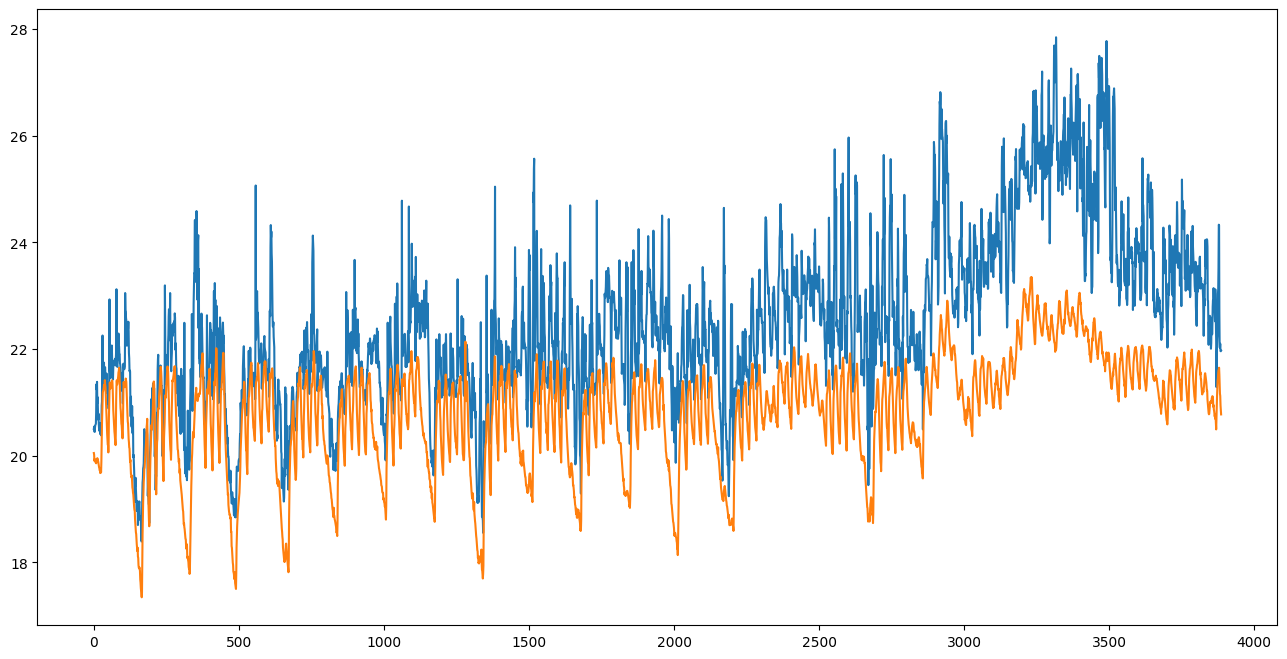

In [21]:
fig, ax = plt.subplots(1, figsize=(16, 8))

ax.plot(y_pred)
ax.plot(y_test.values)

In [22]:
# definitely removed the variance